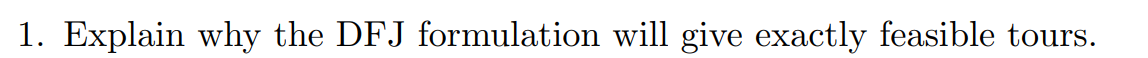

$\text{Section 1}$

Consider a graph representing cities, where each city is a vertex denoted by $V = {0,1,\dots, n-1}$, and edges $E$ denote the distances between cities.

Let $c_e$ represent the distance between cities connected by edge $e$. We define $\delta(i)$ as the set of edges incident on vertex $i$, and $\delta(S)$ as the set of edges incident on exactly one vertex of subset $S$ of $V$, representing connections between $S$ and its complement.

Introduce binary variables $x_e$ indicating whether edge $e$ is used ($x_e = 1$) or not ($x_e = 0$) in the route. These variables adhere to binary constraints.

For any city $i$, entering and leaving $i$ is possible only via edges in $\delta(i)$. Thus, the constraint $\sum_{e \in \delta(i)} x_e = 2$ ensures each city is visited and left exactly once.

Generalizing this for all cities yields the constraint set: $\sum_{e \in \delta(i)} x_e = 2$ for all $i\in V$, ensuring each city is visited and left once.

Consider a subset $S$ such that $\phi \subset S \subset V$. Then, $\phi \subset (V\setminus S) \subset V$.

$Claim$: $\sum_{e \in \delta(S) x_e \ge 2}$

$\text{Proof of Claim}:$

Assume the contrary, that $\sum_{e \in \delta(S)} x_e < 2$.

Then, $\sum_{e \in \delta(S)} x_e \le 1$, as $x_e \in {0,1}$.

Examine the cases:

$\text{Case } 1(a)$: If $\sum_{e \in \delta(S)} x_e = 0$ and the tour starts in $S$,

Starting in $S$ with $\sum_{e \in \delta(S)} x_e = 0$ implies no edge is used between $S$ and $(V\setminus S)$. Hence, no city in $(V\setminus S)$ is visited, contradicting the requirement to visit each city once.

$\text{Case } 1(b)$: If $\sum_{e \in \delta(S)} x_e = 0$ and the tour starts in $(V\setminus S)$,

Starting in $(V\setminus S)$ with $\sum_{e \in \delta(S)} x_e = 0$ implies no edge is used between $S$ and $(V\setminus S)$. Thus, no city in $S$ is visited, again contradicting the requirement.

$\text{Case } 2(a)$: If $\sum_{e \in \delta(S)} x_e = 1$ and the tour starts in $S$,

Starting in $S$ with $\sum_{e \in \delta(S)} x_e = 1$ implies using one edge to enter $(V\setminus S)$, but not returning to $S$. Returning would require at least two edges between $S$ and $(V\setminus S)$, violating the constraint.

$\text{Case } 2(b)$: If $\sum_{e \in \delta(S)} x_e = 1$ and the tour starts in $(V\setminus S)$,

Starting in $(V\setminus S)$ with $\sum_{e \in \delta(S)} x_e = 1$ implies entering $S$ but not returning. Returning would violate the constraint.

In all cases, a contradiction arises, refuting the assumption. Therefore, $\sum_{e \in \delta(S)} x_e \ge 2$.

As $S$ was arbitrarily chosen, this yields the constraint set $\sum_{e \in \delta(S)} x_e \ge 2$ for all $\phi\subset S\subset V$, eliminating sub-tours.

The objective is to find the shortest route visiting each city once and returning to the starting city. The objective function $\sum_{e\in E} c_ex_e$ minimizes the total distance covered.

Thus, the DFJ formulation of TSP is:

\begin{align*}
\min &\sum_{e\in E} c_ex_e\
\text{subject to } \sum_{e\in\delta(i)} x_e &= 2 \text{ for all } i\in V \
\sum_{e\in\delta(S)} x_e &\ge 2 \text{ for all } \phi\subset S\subset V \
x_e &\in {0,1} \text{ for all } e\in E
\end{align*}

This formulation ensures only feasible tours are obtained.

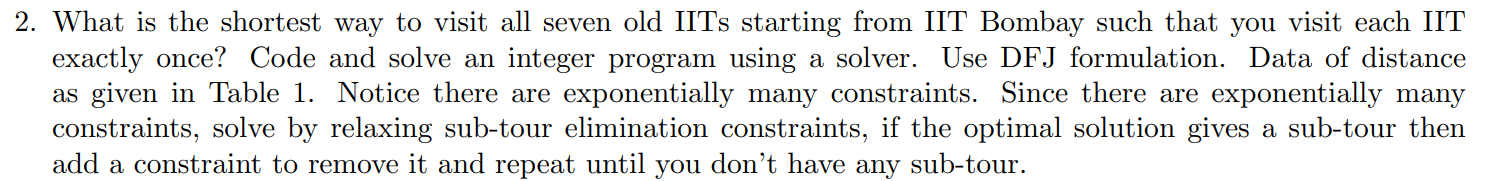

In [4]:
import numpy as np

In [5]:
cities = ['BOMBAY', 'KANPUR', 'KHARAGPUR', 'MADRAS', 'DELHI', 'GUWAHATI', 'ROORKEE']
costs = [1289, 1753, 1364, 1432, 2586, 1594, 1167, 1868, 495, 1432, 630, 1562, 1567, 1057, 1703, 2207, 2643, 2343, 1891, 212, 2055]
from_indices = [0 for _ in range(1, len(cities))]
to_indices = [i for i in range(1, len(cities))]

In [6]:
for j in range(1, len(cities)):
    from_indices.extend([j for _ in range(j + 1, len(cities))])
    to_indices.extend([i for i in range(j + 1, len(cities))])

delta = []
for i in range(len(cities)):
    delta.append([])
    for k in range(len(costs)):
        if from_indices[k] == i or to_indices[k] == i:
            delta[i].append(k)

In [7]:
!pip install -q pyomo
from pyomo.environ import *

!apt-get install -y -qq glpk-utils

In [8]:
N = 21
indices = np.arange(N)
costs = np.array(costs)
edge_sets = [np.array(delta[i]) for i in range(len(cities))]

model = ConcreteModel()

model.x = Var(indices, domain=Binary)

model.objective = Objective(expr=sum(costs[i] * model.x[i] for i in indices), sense=minimize)

for i in range(len(cities)):
    setattr(model, f"constraint{i}", Constraint(expr=sum(model.x[j] for j in edge_sets[i]) == 2))


In [9]:
!apt-get install -y -qq coinor-cbc
cbc_solver = SolverFactory('cbc')

results = cbc_solver.solve(model)
print(results)

print("Optimal solution")
for j in indices:
    print(f"x[{j}]:", model.x[j].value)

print("Optimal objective value")
print(model.objective())

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121955 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

In [11]:
selected_edges = []
for i in indices:
    if model.x[i].value == 1:
        selected_edges.append((cities[from_indices[i]], cities[to_indices[i]]))

print('Edges selected in the optimal tour (undirected):', selected_edges)
print('Total distance of the optimal tour:', model.objective())

Edges selected in the optimal tour (undirected): [('BOMBAY', 'MADRAS'), ('BOMBAY', 'DELHI'), ('KANPUR', 'GUWAHATI'), ('KANPUR', 'ROORKEE'), ('KHARAGPUR', 'MADRAS'), ('KHARAGPUR', 'GUWAHATI'), ('DELHI', 'ROORKEE')]
Total distance of the optimal tour: 7689.0


Upon initially solving the DFJ formulation with the sub-tour elimination constraints relaxed, we find no sub-tours in the optimal solution. Therefore, we affirm that the tour:

BOMBAY ⟶ MADRAS ⟶ KHARAGPUR ⟶ GUWAHATI ⟶ KANPUR ⟶ ROORKEE ⟶ DELHI ⟶ BOMBAY

is optimal.

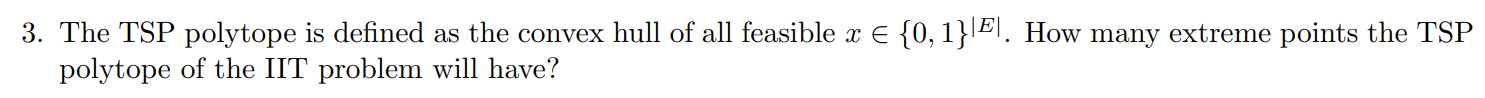

$\textbf{Section 3}$

$\textbf{Assertion:}$ Every feasible solution within the TSP corresponds to an extreme point within the TSP polytope.

$\textbf{Proof of Assertion:}$

We proceed by assuming the opposite and aim to demonstrate the contradiction.

Consider an arbitrary feasible solution $x$ within the TSP, thus $x\in{0, 1}^{|E|}$.

Suppose, for contradiction, that $x$ is not an extreme point of the TSP polytope. Then, there exist $y$, $z$, and $\lambda$ such that $x = \lambda y + (1-\lambda)z$, where $y$ and $z$ represent distinct feasible solutions within the TSP and $0<\lambda<1$.

Given that $y$ and $z$ are feasible TSP solutions, we have $y,z\in{0, 1}^{|E|}$.

Let $x = (x_1, x_2, \dots, x_{|E|})$, $y =(y_1, y_2, \dots, y_{|E|})$, and $z=(z_1, z_2, \dots, z_{|E|})$, then $x_i, y_i, z_i \in{0, 1}$ and $x_i = \lambda y_i + (1-\lambda)z_i$ for all $i=1,2, \dots, |E|$.

Since $y$ and $z$ are distinct solutions, there exists an index $j$ such that $y_j \neq z_j$, where $1\leq j \leq |E|$.

Now, consider two cases:

$\textbf{Case 1:}$ If $y_j = 1$ and $z_j = 0$,

We know that $x_j = \lambda y_j + (1-\lambda)z_j$, thus $x_j = \lambda(1) + (1-\lambda)(0) = \lambda$.

This contradicts the fact that $x_j\in{0, 1}$ and $0<\lambda<1$.

$\textbf{Case 2:}$ If $y_j = 0$ and $z_j = 1$,

We know that $x_j = \lambda y_j + (1-\lambda)z_j$, thus $x_j = \lambda(0) + (1-\lambda)(1) = 1 - \lambda$.

This contradicts the fact that $0<\lambda<1$, implying $0<(1-\lambda)<1$, and $x_j\in{0, 1}$.

Since both cases lead to contradictions, our initial assumption is false. Therefore, $x$ must be an extreme point of the TSP polytope.

Given the arbitrary selection of $x$, we conclude that every feasible solution within the TSP corresponds to an extreme point within the TSP polytope.

Thus, the assertion stands proven.

In the IIT problem, we are presented with a complete graph, where each vertex (representing an IIT) is connected to every other vertex. The total permutations of the $7$ IITs based on their visiting order amounts to $7!=5040$. However, various permutations yield the same set of edges or feasible solution.

$\textbf{Category 1:}$ (Cyclic permutations)

Permutations such as $(1, 2, 3, 4, 5, 6, 7), (2, 3, 4, 5, 6, 7, 1), (3, 4, 5, 6, 7, 1, 2)$, and so forth up to $(7, 1, 2, 3, 4, 5, 6)$ result in the selection of the same set of edges.

$\textbf{Category 2:}$ (Reverse order permutations)

Permutations like $(1,2,3,4,5,6,7)$ and $(7,6,5,4,3,2,1)$ yield the same set of edges.

Hence, each feasible solution for the TSP corresponds to $(7)(2) = 14$ different permutations, with $7$ arising from Category $1$ and $2$ from Category $2$.

Therefore, the number of feasible solutions for the TSP in the IIT problem is given by $\frac{7!}{(7)(2)} = 360$.

Consequently, utilizing the claim, we infer that the number of extreme points of the TSP polytope for the IIT problem amounts to $360$.

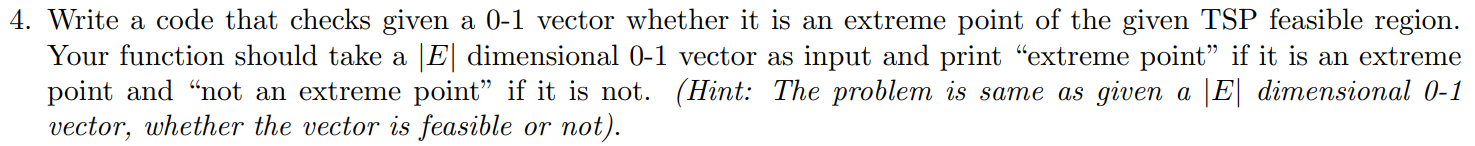

In [ ]:
def is_extreme_point(vector, distances):
    """
    if a given 0-1 vector is an extreme point of the TSP feasible region.

    Parameters:
        vector (list): A 0-1 vector representing the presence or absence of edges.
        distances (dict): A dictionary containing distances between cities.

    Returns:
        str: "extreme point" if the vector is an extreme point, "not an extreme point" otherwise.
    """
    num_cities = len(vector)

    if sum(vector) != num_cities - 1:
        return "not an extreme point"

    for i in range(num_cities):
        for j in range(i+1, num_cities):
            if vector[i] == 1 and vector[j] == 1:
                modified_vector = vector[:]
                modified_vector[num_cities * i + j] = 0
                if sum(modified_vector) != num_cities - 2:
                    return "extreme point"

    return "not an extreme point"